In [3]:
# Generate data specifically cubic data, y= x^{3}- 3x + 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x_data = np.arange(-3, 3, .1)
y_numeric = x_data ** 3 - 3 * x_data + 2
y_categorical = (y_numeric >= 2).astype(int)

# add noise
noise = np.array([ 1.20109968,  0.5143968 , -0.75046677,  0.61609437, -1.42564964,
       -0.24278509, -0.06682367, -0.07221022, -1.25231036,  0.10505861,
        0.83387709, -1.49745355,  0.39227633, -1.45015043,  1.02000935,
       -0.92474454,  1.46654345, -0.22729801, -2.68092581,  0.19022616,
        1.460804  ,  0.05054745, -0.32031863, -0.20126538,  1.45846302,
       -0.18968677,  1.1490469 , -1.13536056, -0.37933621,  1.09194987,
       -0.62442628,  1.23550369,  1.34559668, -0.40558424,  1.20431376,
        1.44755194, -0.24809615, -0.38604721,  1.07668887,  0.80339283,
       -1.03546213, -1.29254652,  2.92751962,  0.17439257, -1.40184363,
       -1.31655769, -0.32464697, -0.01413023, -1.27810733,  1.02339441,
       -1.02522028, -0.42611774, -0.37729729,  1.1996452 ,  0.79166404,
        1.20745722, -0.37161452, -0.19916778,  1.20829573,  1.28583724])

y_numeric_noisy = y_numeric + noise
y_categorical_noisy = (y_numeric_noisy >= 2).astype(int)

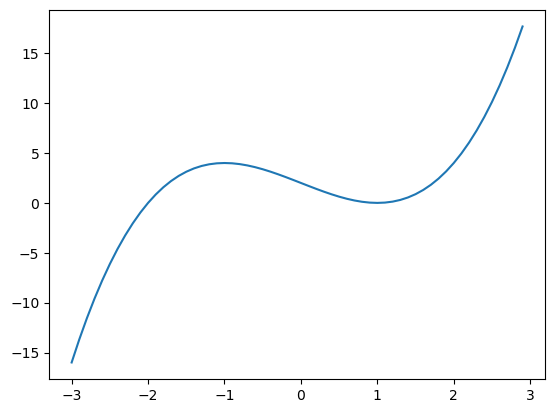

In [4]:
# Plot original data

plt.plot(x_data, y_numeric, -3, 3)
plt.show()

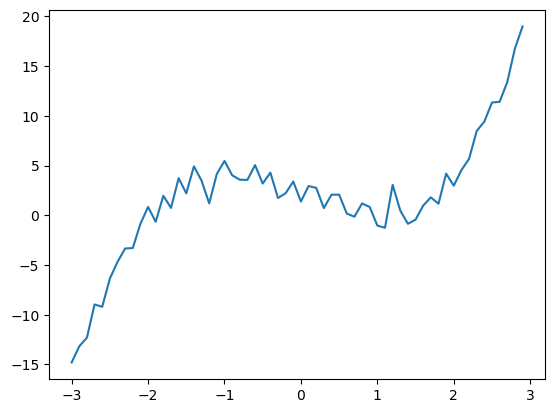

In [5]:
# Plot noisy data

plt.plot(x_data, y_numeric_noisy, -3, 3)
plt.show()

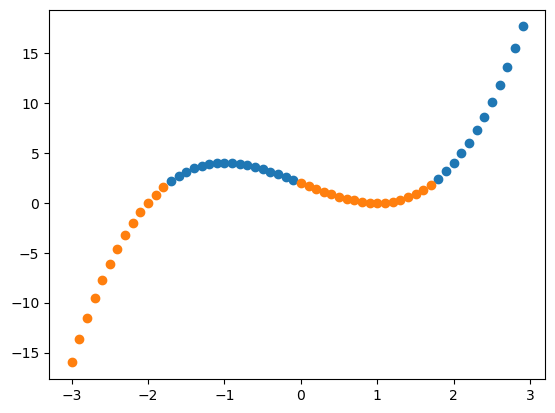

In [6]:
positives = np.array([(i, j) for i, j in zip(x_data, y_numeric) if j >= 2])
negatives = np.array([(i, j) for i, j in zip(x_data, y_numeric) if j < 2])
plt.scatter(positives[:,0], positives[:,1])
plt.scatter(negatives[:,0], negatives[:,1])
plt.show()

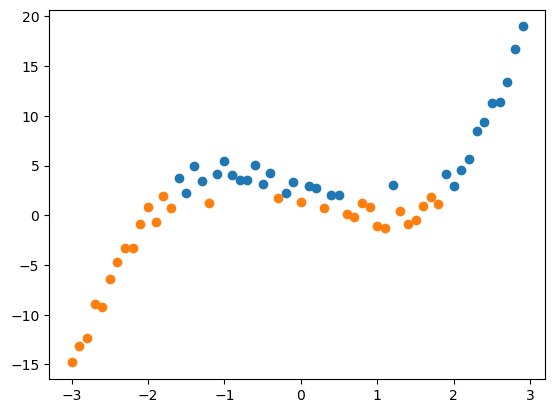

In [7]:
positives = np.array([(i, j) for i, j in zip(x_data, y_numeric_noisy) if j >= 2])
negatives = np.array([(i, j) for i, j in zip(x_data, y_numeric_noisy) if j < 2])
plt.scatter(positives[:,0], positives[:,1])
plt.scatter(negatives[:,0], negatives[:,1])
plt.show()

# Neural Network 1: Regression, no hidden layer

In [8]:
# Neural network 1, no hidden layer, regression (should duplicate linear regression)

# Activation function is identity function (not sigmoid)
# Loss function is squared error

X_train = np.array(x_data).reshape((-1, 1))
X_train = np.hstack([ np.ones((len(x_data), 1)), X_train ])
y_train = y_numeric_noisy

W = np.array([[.1, .2]])

def compute_z_vector(W, input_vector):
    return W @ input_vector

def compute_activation_vector(z_vector):
    return z_vector # identity function

def compute_loss(a, y):
    return .5 * (a - y) ** 2

def compute_cost(X_data, y_data, W):
    m = X_data.shape[0] # number of data points
    cost = 0
    
    for i in range(m):
        y_hat = make_prediction(X_data[i], W)
        y = y_data[i]
        cost += compute_loss(y_hat, y)
    total_cost = (1 / (2 * m)) * cost

    return total_cost

def augment_vector(v):
    return np.insert(v, 0, 1)

def forward_prop(W, x, **kwargs):
    # process kwargs
    verbose = kwargs['verbose'] if 'verbose' in kwargs else False
    output_only = kwargs['output_only'] if 'output_only' in kwargs else False
    
    # we assume x has the 1 in front.
    
    # set a0
    a0 = x
    if verbose: print("Input to this layer is", a0)

    # get W matrix
    if verbose: print("Using W of shape", W.shape)

    # compute z
    z1 = compute_z_vector(W, a0)
    if verbose: print("z is", z1)

    # compute activation
    a1 = compute_activation_vector(z1)
    if verbose: print("activation is", a1)
    
    if output_only:
        return a1
    else:
        return z1, a1
    
def make_prediction(x, W):
    return forward_prop(W, x, output_only=True)

def deriv_loss(a, y):
    return (a-y)

def deriv_activation(z):
    return 1

def backward_prop(W, x, y, z1, a1):
    # we assume x has the 1 in front.
    
    # compute dL/dw0 
    dL_da = deriv_loss(a1, y)
    da_dz = deriv_activation(z1)
    dz_dw0 = x[0]
    # multiply
    dL_dw0 = dL_da * da_dz * dz_dw0
    
    # compute dL/dw0 (first two pieces already done)
    dz_dw1 = x[1]
    # multiply
    dL_dw1 = dL_da * da_dz * dz_dw1
    
    return dL_dw0, dL_dw1
     
    

In [9]:
z1, a1 = forward_prop(W, X_train[0], verbose=True)

Input to this layer is [ 1. -3.]
Using W of shape (1, 2)
z is [-0.5]
activation is [-0.5]


In [10]:
compute_cost(X_train, y_train, W)

array([9.14317386])

In [11]:
backward_prop(W, X_train[0], y_train[0], z1, a1)

(array([14.29890032]), array([-42.89670096]))

In [12]:
# stochastic gradient descent:

W = np.array([[.1, .2]])
ALPHA = .003

J_sequence = []

print("x train is", X_train)
print("y train is", y_train)

for ctr in range(0, 20):
    #print("Iteration: ", ctr)
    #print("W =", W)
    #print("Cost is", compute_cost(X_train, y_train, W))
    
    for i in range(X_train.shape[0]):   # m
        z1, a1 = forward_prop(W, X_train[i])
        dL_dw0, dL_dw1 = backward_prop(W, X_train[i], y_train[i], z1, a1)
        #print("Gradients", dL_dw0, dL_dw1)
        W[0][0] -= ALPHA * dL_dw0
        W[0][1] -= ALPHA * dL_dw1
        J_sequence.append(compute_cost(X_train, y_train, W))
        
    # "batch" gradient descent:
    #D = [0,0]
    #for i in range(X_train.shape[0]):   # m
    #    z1, a1 = forward_prop(W, X_train[i])
    #    dL_dw0, dL_dw1 = backward_prop(W, X_train[i], y_train[i], z1, a1)
    #    #print("Gradients", dL_dw0, dL_dw1)
    #    #W[0][0] -= ALPHA * dL_dw0
    #    #W[0][1] -= ALPHA * dL_dw1
    #    D[0] += dL_dw0
    #   D[1] += dL_dw1   
    #W[0][0] -= ALPHA * D[0]
    #W[0][1] -= ALPHA * D[1]
                              
    J_sequence.append(compute_cost(X_train, y_train, W))
    
print("Final W:", W)
print("Final cost:", compute_cost(X_train, y_train, W))

x train is [[ 1.00000000e+00 -3.00000000e+00]
 [ 1.00000000e+00 -2.90000000e+00]
 [ 1.00000000e+00 -2.80000000e+00]
 [ 1.00000000e+00 -2.70000000e+00]
 [ 1.00000000e+00 -2.60000000e+00]
 [ 1.00000000e+00 -2.50000000e+00]
 [ 1.00000000e+00 -2.40000000e+00]
 [ 1.00000000e+00 -2.30000000e+00]
 [ 1.00000000e+00 -2.20000000e+00]
 [ 1.00000000e+00 -2.10000000e+00]
 [ 1.00000000e+00 -2.00000000e+00]
 [ 1.00000000e+00 -1.90000000e+00]
 [ 1.00000000e+00 -1.80000000e+00]
 [ 1.00000000e+00 -1.70000000e+00]
 [ 1.00000000e+00 -1.60000000e+00]
 [ 1.00000000e+00 -1.50000000e+00]
 [ 1.00000000e+00 -1.40000000e+00]
 [ 1.00000000e+00 -1.30000000e+00]
 [ 1.00000000e+00 -1.20000000e+00]
 [ 1.00000000e+00 -1.10000000e+00]
 [ 1.00000000e+00 -1.00000000e+00]
 [ 1.00000000e+00 -9.00000000e-01]
 [ 1.00000000e+00 -8.00000000e-01]
 [ 1.00000000e+00 -7.00000000e-01]
 [ 1.00000000e+00 -6.00000000e-01]
 [ 1.00000000e+00 -5.00000000e-01]
 [ 1.00000000e+00 -4.00000000e-01]
 [ 1.00000000e+00 -3.00000000e-01]
 [ 1.0000

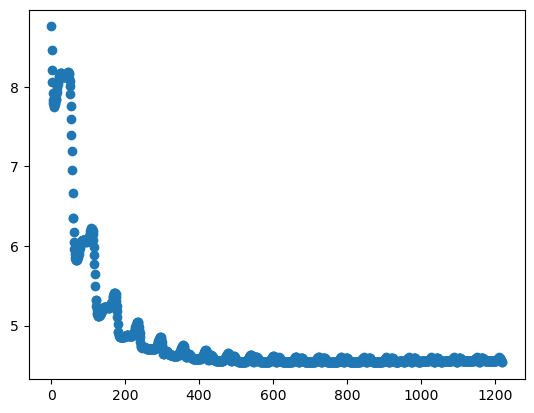

In [13]:
# Let's plot the cost as a function of number of iterations of the
# gradient descent algorithm.

plt.scatter(range(0, len(J_sequence)), J_sequence)
plt.show()

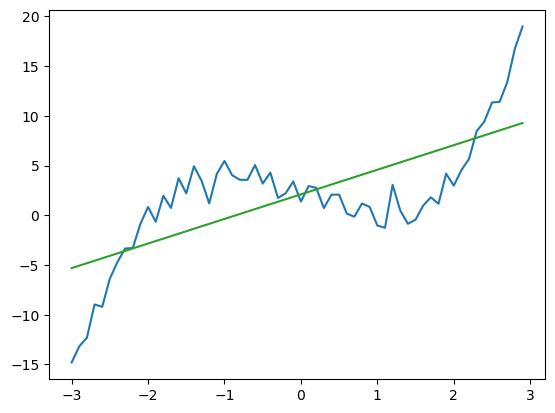

In [14]:
# Recreate original plot

y_predicted = [make_prediction([1, x], W) for x in x_data]
plt.plot(x_data, y_numeric_noisy, -3, 3)
plt.plot(x_data, y_predicted)
plt.show()

In [15]:
# Verify this matches linear regression

# Download and install scikit-learn if not already done:
%pip install scikit-learn

# Import the logistic regression functionality from scikit-learn
from sklearn.linear_model import LinearRegression

# Create a logistic regression model and train it on our training data:
model = LinearRegression(fit_intercept=False).fit(X_train, y_train)

# model.coef_ contains the w vector that this linear regression model was able to find

print("w found through scikit-learn:", model.coef_)

Note: you may need to restart the kernel to use updated packages.
w found through scikit-learn: [1.90618493 2.47770018]


# Neural network 2: Classification, no hidden layer 

In [16]:
# Neural network 2: Classification, no hidden layer (should duplicate logistic regression)

# Activation function is sigmoid
# Loss function is cross entropy

X_train = np.array(x_data).reshape((-1, 1))
X_train = np.hstack([ np.ones((len(x_data), 1)), X_train ])
y_train = y_categorical_noisy

W = np.array([[.1, .2]])

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def compute_z_vector(W, input_vector):
    return W @ input_vector

def compute_activation_vector(z_vector):
    return sigmoid(z_vector)

def compute_loss(a, y):
    if y == 0:
        return -np.log(1-a)
    else:
        return -np.log(a)

def compute_cost(X_data, y_data, W):
    m = X_data.shape[0] # number of data points
    cost = 0
    
    for i in range(m):
        y_hat = make_prediction(X_data[i], W)
        y = y_data[i]
        cost += compute_loss(y_hat, y)
    total_cost = (1 / m) * cost

    return total_cost

def augment_vector(v):
    return np.insert(v, 0, 1)

def forward_prop(W, x, **kwargs):
    # process kwargs
    verbose = kwargs['verbose'] if 'verbose' in kwargs else False
    output_only = kwargs['output_only'] if 'output_only' in kwargs else False
    
    # we assume x has the 1 in front.
    
    # set a0
    a0 = x
    if verbose: print("Input to this layer is", a0)

    # get W matrix
    if verbose: print("Using W of shape", W.shape)

    # compute z
    z1 = compute_z_vector(W, a0)
    if verbose: print("z is", z1)

    # compute activation
    a1 = compute_activation_vector(z1)
    if verbose: print("activation is", a1)
    
    if output_only:
        return a1
    else:
        return z1, a1
    
def make_prediction(x, W):
    return forward_prop(W, x, output_only=True)

def deriv_loss(a, y):
    return (a-y)/(a*(1-a))

def deriv_activation(z):
    return sigmoid(z) * (1-sigmoid(z))

def backward_prop(W, x, y, z1, a1):
    # we assume x has the 1 in front.
    
    # compute dL/dw0 
    dL_da = deriv_loss(a1, y)
    da_dz = deriv_activation(z1)
    dz_dw0 = x[0]
    # multiply
    dL_dw0 = dL_da * da_dz * dz_dw0
    
    # compute dL/dw0 (first two pieces already done)
    dz_dw1 = x[1]
    # multiply
    dL_dw1 = dL_da * da_dz * dz_dw1
    
    return dL_dw0, dL_dw1
     
    

In [17]:
z1, a1 = forward_prop(W, X_train[0], verbose=True)

Input to this layer is [ 1. -3.]
Using W of shape (1, 2)
z is [-0.5]
activation is [0.37754067]


In [25]:
compute_cost(X_train, y_train, W)
print(881+119)
print(sigmoid(-3), sigmoid(-2), sigmoid(-1), sigmoid(0), sigmoid(1), sigmoid(2), sigmoid(3))

1000
0.04742587317756678 0.11920292202211755 0.2689414213699951 0.5 0.7310585786300049 0.8807970779778823 0.9525741268224334


In [21]:
backward_prop(W, X_train[0], y_train[0], z1, a1)

(array([0.37754067]), array([-1.13262201]))

In [22]:
# stochastic gradient descent:

W = np.array([[.1, .2]])
ALPHA = .001

J_sequence = []

print("x train is", X_train)
print("y train is", y_train)

for ctr in range(0, 200):
    #print("Iteration: ", ctr)
    #print("W =", W)
    #print("Cost is", compute_cost(X_train, y_train, W))
    
    for i in range(X_train.shape[0]):   # m
        z1, a1 = forward_prop(W, X_train[i])
        dL_dw0, dL_dw1 = backward_prop(W, X_train[i], y_train[i], z1, a1)
        #print("Gradients", dL_dw0, dL_dw1)
        W[0][0] -= ALPHA * dL_dw0
        W[0][1] -= ALPHA * dL_dw1
                              
    J_sequence.append(compute_cost(X_train, y_train, W))
    
print("Final W:", W)

x train is [[ 1.00000000e+00 -3.00000000e+00]
 [ 1.00000000e+00 -2.90000000e+00]
 [ 1.00000000e+00 -2.80000000e+00]
 [ 1.00000000e+00 -2.70000000e+00]
 [ 1.00000000e+00 -2.60000000e+00]
 [ 1.00000000e+00 -2.50000000e+00]
 [ 1.00000000e+00 -2.40000000e+00]
 [ 1.00000000e+00 -2.30000000e+00]
 [ 1.00000000e+00 -2.20000000e+00]
 [ 1.00000000e+00 -2.10000000e+00]
 [ 1.00000000e+00 -2.00000000e+00]
 [ 1.00000000e+00 -1.90000000e+00]
 [ 1.00000000e+00 -1.80000000e+00]
 [ 1.00000000e+00 -1.70000000e+00]
 [ 1.00000000e+00 -1.60000000e+00]
 [ 1.00000000e+00 -1.50000000e+00]
 [ 1.00000000e+00 -1.40000000e+00]
 [ 1.00000000e+00 -1.30000000e+00]
 [ 1.00000000e+00 -1.20000000e+00]
 [ 1.00000000e+00 -1.10000000e+00]
 [ 1.00000000e+00 -1.00000000e+00]
 [ 1.00000000e+00 -9.00000000e-01]
 [ 1.00000000e+00 -8.00000000e-01]
 [ 1.00000000e+00 -7.00000000e-01]
 [ 1.00000000e+00 -6.00000000e-01]
 [ 1.00000000e+00 -5.00000000e-01]
 [ 1.00000000e+00 -4.00000000e-01]
 [ 1.00000000e+00 -3.00000000e-01]
 [ 1.0000

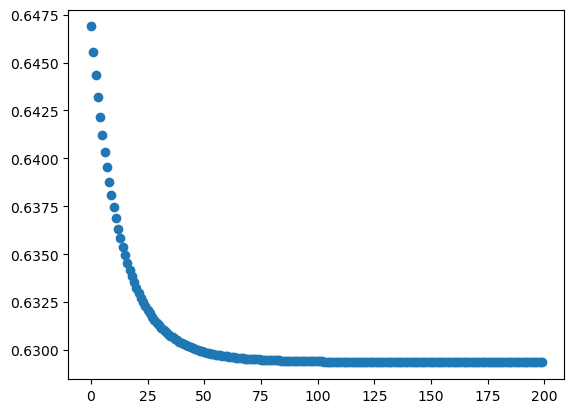

In [23]:
# Let's plot the cost as a function of number of iterations of the
# gradient descent algorithm.

plt.scatter(range(0, len(J_sequence)), J_sequence)
plt.show()

In [24]:
# Download and install scikit-learn if not already done:
%pip install scikit-learn

# Import the logistic regression functionality from scikit-learn
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model and train it on our training data:
model = LogisticRegression(random_state=0, penalty=None, fit_intercept=False).fit(X_train, y_train)

# If the line above gives an error about penalty=None, try switching that part to penalty='none' instead.

# model.coef_ contains the w vector that this logistic regression model was able to find.

print("w found through scikit-learn:", model.coef_[0])

Note: you may need to restart the kernel to use updated packages.
w found through scikit-learn: [0.02191567 0.43830831]


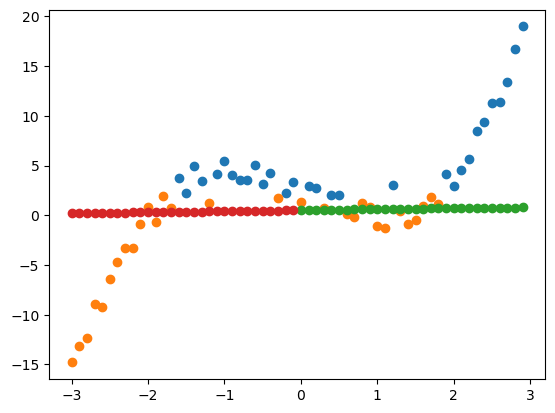

In [25]:
# Recreate original plot

positives = np.array([(i, j) for i, j in zip(x_data, y_numeric_noisy) if j >= 2])
negatives = np.array([(i, j) for i, j in zip(x_data, y_numeric_noisy) if j < 2])
plt.scatter(positives[:,0], positives[:,1])
plt.scatter(negatives[:,0], negatives[:,1])

y_predicted = [make_prediction([1, x], W) for x in x_data]
positives = np.array([(i, j[0]) for i, j in zip(x_data, y_predicted) if j >= .5])
negatives = np.array([(i, j[0]) for i, j in zip(x_data, y_predicted) if j < .5])
plt.scatter(positives[:,0], positives[:,1])
plt.scatter(negatives[:,0], negatives[:,1])

plt.show()

# Neural Network 3, 1 hidden layer with 2 neurons, regression



In [26]:
# Neural network 3, 1 hidden layer, regression

# Activation function is sigmoid for layer 1, but identity for layer 2
# Loss function is squared error

X_train = np.array(x_data).reshape((-1, 1))
X_train = np.hstack([ np.ones((len(x_data), 1)), X_train ])
y_train = y_numeric_noisy

W1 = np.array([[.1, .2], [.3, .4]])
W2 = np.array([[.5, .6, .7]])
            
def compute_z_vector(W, input_vector):
    return W @ input_vector

def compute_activation_vector(z_vector):
    return sigmoid(z_vector)

def compute_activation_vector_final(z_vector):
    return z_vector # identity function

def compute_loss(a, y):
    return .5 * (a - y) ** 2

def compute_cost(X_data, y_data, W1, W2):
    m = X_data.shape[0] # number of data points
    cost = 0
    
    for i in range(m):
        y_hat = make_prediction(X_data[i], W1, W2)
        y = y_data[i]
        cost += compute_loss(y_hat, y)
    total_cost = (1 / (2 * m)) * cost

    return total_cost

def augment_vector(v):
    return np.insert(v, 0, 1)

def forward_prop(W1, W2, x, **kwargs):
    # process kwargs
    verbose = kwargs['verbose'] if 'verbose' in kwargs else False
    output_only = kwargs['output_only'] if 'output_only' in kwargs else False
    
    # we assume x has the 1 in front.
    
    # set input1
    in1 = x
    if verbose: print("Input to layer 1 is", in1)

    # get W1 matrix
    if verbose: print("Using W1 of shape", W1.shape, W1, in1)

    # compute z
    z1 = compute_z_vector(W1, in1)
    if verbose: print("z1 is", z1)

    # compute activation
    a1 = sigmoid(z1)
    if verbose: print("a1 is", a1)
    
    # set input2
    in2 = augment_vector(a1)
    if verbose: print("Input to layer 2 is", in2)

    # get W2 matrix
    if verbose: print("Using W2 of shape", W2.shape)

    # compute z
    z2 = compute_z_vector(W2, in2)
    if verbose: print("z2 is", z2)

    # compute activation
    a2 = z2  # identity
    if verbose: print("a2 is", a2)
    
    if output_only:
        return a2
    else:
        return z1, a1, in2, z2, a2
    
def make_prediction(x, W1, W2):
    return forward_prop(W1, W2, x, output_only=True)

def deriv_loss(a, y):
    return (a-y)

def deriv_sigmoid(z):
    return sigmoid(z) * (1-sigmoid(z))

def deriv_identity(z):
    return 1

def backward_prop(W1, W2, x, y, z1, a1, in2, z2, a2):
    # we assume x has the 1 in front.
    
    # Calculations for layer 2:
    
    # compute dL/dw[2]00 
    dL_da_2_0 = deriv_loss(a2[0], y)
    da_2_0_dz_2_0 = deriv_identity(z2[0])
    dz_2_0_dw_2_00 = in2[0]
    # multiply
    dL_dw_2_00 = dL_da_2_0 * da_2_0_dz_2_0 * dz_2_0_dw_2_00
    
    # compute dL/dw[2]01  [first two terms are the same as above]
    dz_2_0_dw_2_01 = in2[1]
    # multiply
    dL_dw_2_01 = dL_da_2_0 * da_2_0_dz_2_0 * dz_2_0_dw_2_01
    
    # compute dL/dw[2]02  [first two terms are the same as above]
    dz_2_0_dw_2_02 = in2[2]
    # multiply
    dL_dw_2_02 = dL_da_2_0 * da_2_0_dz_2_0 * dz_2_0_dw_2_02
    
    ## Calcs for layer 1:
    
    # compute dL/dw[1]00  [first two terms are the same as in layer 2]
    dz_2_0_da_1_0 = W2[0][1]
    da_1_0_dz_1_0 = deriv_sigmoid(z1[0])
    dz_1_0_dw_1_00 = x[0]
    # multiply
    dL_dw_1_00 = dL_da_2_0 * da_2_0_dz_2_0 * dz_2_0_da_1_0 * da_1_0_dz_1_0 * dz_1_0_dw_1_00
    
    # compute dL/dw[1]01  [first four terms are the same as above]
    dz_1_0_dw_1_01 = x[1]
    # multiply
    dL_dw_1_01 = dL_da_2_0 * da_2_0_dz_2_0 * dz_2_0_da_1_0 * da_1_0_dz_1_0 * dz_1_0_dw_1_01
    
    # compute dL/dw[1]10  [first two terms are the same as layer 2]
    dz_2_0_da_1_1 = W2[0][2]
    da_1_1_dz_1_1 = deriv_sigmoid(z1[1])
    dz_1_1_dw_1_10 = x[0]
    # multiply
    dL_dw_1_10 = dL_da_2_0 * da_2_0_dz_2_0 * dz_2_0_da_1_1 * da_1_1_dz_1_1 * dz_1_1_dw_1_10
    
    # compute dL/dw[1]11  [first four terms are the same as above]
    dz_1_1_dw_1_11 = x[1]
    # multiply
    dL_dw_1_11 = dL_da_2_0 * da_2_0_dz_2_0 * dz_2_0_da_1_1 * da_1_1_dz_1_1 * dz_1_1_dw_1_11
    
    # return updates to W1 and W2
    
    delta_W1 = np.array([[dL_dw_1_00, dL_dw_1_01], [dL_dw_1_10, dL_dw_1_11]])
    delta_W2 = np.array([[dL_dw_2_00, dL_dw_2_01, dL_dw_2_02]])
    return delta_W1, delta_W2
    

In [27]:
z1, a1, in2, z2, a2 = forward_prop(W1, W2, X_train[0], verbose=True)

Input to layer 1 is [ 1. -3.]
Using W1 of shape (2, 2) [[0.1 0.2]
 [0.3 0.4]] [ 1. -3.]
z1 is [-0.5 -0.9]
a1 is [0.37754067 0.2890505 ]
Input to layer 2 is [1.         0.37754067 0.2890505 ]
Using W2 of shape (1, 3)
z2 is [0.92885975]
a2 is [0.92885975]


In [28]:
compute_cost(X_train, y_train, W1, W2)

array([8.88735153])

In [29]:
backward_prop(W1, W2, X_train[0], y_train[0], z1, a1, in2, z2, a2)

(array([[ 2.2176492 , -6.6529476 ],
        [ 2.26244167, -6.78732501]]),
 array([[15.72776007,  5.93786906,  4.54611687]]))

In [30]:
# stochastic gradient descent:

W1 = np.array([[.1, .2], [.3, .4]])
W2 = np.array([[.5, .6, .7]])
ALPHA = .01

J_sequence = []

print("x train is", X_train)
print("y train is", y_train)

for ctr in range(0, 500):
    #print("Iteration: ", ctr)
    #print("W =", W1, W2)
    print("Cost is", compute_cost(X_train, y_train, W1, W2))
    
    for i in range(X_train.shape[0]):   # m
        z1, a1, in2, z2, a2 = forward_prop(W1, W2, X_train[i])
        delta_W1, delta_W2 = backward_prop(W1, W2, X_train[i], y_train[i], z1, a1, in2, z2, a2)
        #print("Gradients", delta_W1, delta_W2)
        W1 -= ALPHA * delta_W1
        W2 -= ALPHA * delta_W2
        #J_sequence.append(compute_cost(X_train, y_train, W1, W2))
        
    #"batch" gradient descent:
    #D = [np.full_like(W1, 0),np.full_like(W2, 0)]
    #for i in range(X_train.shape[0]):   # m
    #    z1, a1, in2, z2, a2 = forward_prop(W1, W2, X_train[i])
    #    delta_W1, delta_W2 = backward_prop(W1, W2, X_train[i], y_train[i], z1, a1, in2, z2, a2)
    #    #print("Gradients", delta_W1, delta_W2)
    #    #W[0][0] -= ALPHA * dL_dw0
    #    #W[0][1] -= ALPHA * dL_dw1
    #    D[0] += delta_W1
    #    D[1] += delta_W2   
    #W1 -= ALPHA * D[0]/X_train.shape[0]
    #W2 -= ALPHA * D[1]/X_train.shape[0]
                              
    J_sequence.append(compute_cost(X_train, y_train, W1, W2))
    
print("Final W1, W2:", W1, W2)

x train is [[ 1.00000000e+00 -3.00000000e+00]
 [ 1.00000000e+00 -2.90000000e+00]
 [ 1.00000000e+00 -2.80000000e+00]
 [ 1.00000000e+00 -2.70000000e+00]
 [ 1.00000000e+00 -2.60000000e+00]
 [ 1.00000000e+00 -2.50000000e+00]
 [ 1.00000000e+00 -2.40000000e+00]
 [ 1.00000000e+00 -2.30000000e+00]
 [ 1.00000000e+00 -2.20000000e+00]
 [ 1.00000000e+00 -2.10000000e+00]
 [ 1.00000000e+00 -2.00000000e+00]
 [ 1.00000000e+00 -1.90000000e+00]
 [ 1.00000000e+00 -1.80000000e+00]
 [ 1.00000000e+00 -1.70000000e+00]
 [ 1.00000000e+00 -1.60000000e+00]
 [ 1.00000000e+00 -1.50000000e+00]
 [ 1.00000000e+00 -1.40000000e+00]
 [ 1.00000000e+00 -1.30000000e+00]
 [ 1.00000000e+00 -1.20000000e+00]
 [ 1.00000000e+00 -1.10000000e+00]
 [ 1.00000000e+00 -1.00000000e+00]
 [ 1.00000000e+00 -9.00000000e-01]
 [ 1.00000000e+00 -8.00000000e-01]
 [ 1.00000000e+00 -7.00000000e-01]
 [ 1.00000000e+00 -6.00000000e-01]
 [ 1.00000000e+00 -5.00000000e-01]
 [ 1.00000000e+00 -4.00000000e-01]
 [ 1.00000000e+00 -3.00000000e-01]
 [ 1.0000

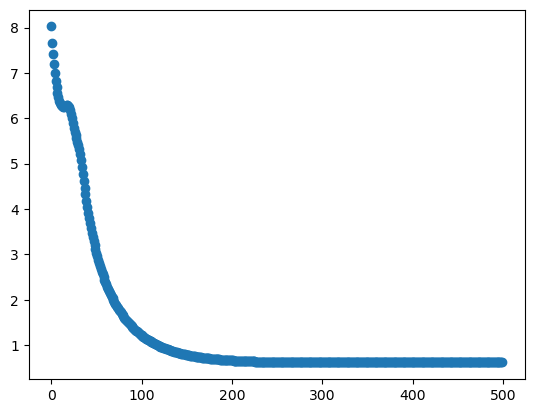

In [31]:
# Let's plot the cost as a function of number of iterations of the
# gradient descent algorithm.

plt.scatter(range(0, len(J_sequence)), J_sequence)
plt.show()

[[-13.59971      5.40044671]
 [ 11.85253897   4.90324398]] [[-14.07824527  18.65969786  16.0148775 ]]


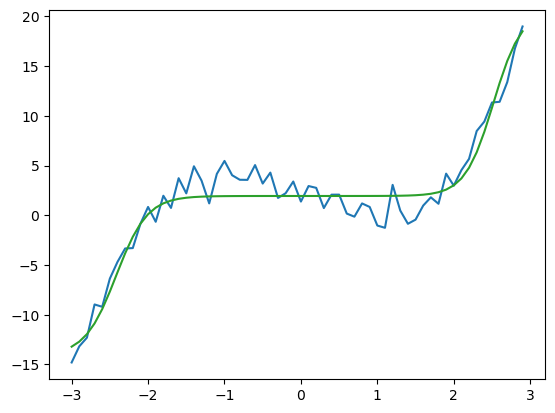

In [32]:
# Recreate original plot
print(W1, W2)
y_predicted = [make_prediction([1, x], W1, W2) for x in x_data]
plt.plot(x_data, y_numeric_noisy, -3, 3)
plt.plot(x_data, y_predicted)
plt.show()

# Neural Network 4, 1 hidden layer with 2 neurons, classification

In [33]:
# Neural network 4, 1 hidden layer, classification

# Activation function is sigmoid for layer 1 and 2
# Loss function is cross entropy

X_train = np.array(x_data).reshape((-1, 1))
X_train = np.hstack([ np.ones((len(x_data), 1)), X_train ])
y_train = y_categorical_noisy

W1 = np.array([[.1, .2], [.3, .4]])
W2 = np.array([[.5, .6, .7]])
            
def compute_z_vector(W, input_vector):
    return W @ input_vector

def compute_loss(a, y):
    if y == 0:
        return -np.log(1-a)
    else:
        return -np.log(a)

def compute_cost(X_data, y_data, W1, W2):
    m = X_data.shape[0] # number of data points
    cost = 0
    
    for i in range(m):
        y_hat = make_prediction(X_data[i], W1, W2)
        y = y_data[i]
        cost += compute_loss(y_hat, y)
    total_cost = (1 / m) * cost

    return total_cost

def augment_vector(v):
    return np.insert(v, 0, 1)

def forward_prop(W1, W2, x, **kwargs):
    # process kwargs
    verbose = kwargs['verbose'] if 'verbose' in kwargs else False
    output_only = kwargs['output_only'] if 'output_only' in kwargs else False
    
    # we assume x has the 1 in front.
    
    # set input1
    in1 = x
    if verbose: print("Input to layer 1 is", in1)

    # get W1 matrix
    if verbose: print("Using W1 of shape", W1.shape, W1, in1)

    # compute z
    z1 = compute_z_vector(W1, in1)
    if verbose: print("z1 is", z1)

    # compute activation
    a1 = sigmoid(z1)
    if verbose: print("a1 is", a1)
    
    # set input2
    in2 = augment_vector(a1)
    if verbose: print("Input to layer 2 is", in2)

    # get W2 matrix
    if verbose: print("Using W2 of shape", W2.shape)

    # compute z
    z2 = compute_z_vector(W2, in2)
    if verbose: print("z2 is", z2)

    # compute activation
    a2 = sigmoid(z2)
    if verbose: print("a2 is", a2)
    
    if output_only:
        return a2
    else:
        return z1, a1, in2, z2, a2
    
def make_prediction(x, W1, W2):
    return forward_prop(W1, W2, x, output_only=True)

def deriv_loss(a, y):
    return (a-y)/(a*(1-a))

def deriv_sigmoid(z):
    return sigmoid(z) * (1-sigmoid(z))

def deriv_identity(z):
    return 1

def backward_prop(W1, W2, x, y, z1, a1, in2, z2, a2):
    # we assume x has the 1 in front.
    
    # Calculations for layer 2:
    
    # compute dL/dw[2]00 
    dL_da_2_0 = deriv_loss(a2[0], y)
    da_2_0_dz_2_0 = deriv_sigmoid(z2[0])
    dz_2_0_dw_2_00 = in2[0]
    # multiply
    dL_dw_2_00 = dL_da_2_0 * da_2_0_dz_2_0 * dz_2_0_dw_2_00
    
    # compute dL/dw[2]01  [first two terms are the same as above]
    dz_2_0_dw_2_01 = in2[1]
    # multiply
    dL_dw_2_01 = dL_da_2_0 * da_2_0_dz_2_0 * dz_2_0_dw_2_01
    
    # compute dL/dw[2]02  [first two terms are the same as above]
    dz_2_0_dw_2_02 = in2[2]
    # multiply
    dL_dw_2_02 = dL_da_2_0 * da_2_0_dz_2_0 * dz_2_0_dw_2_02
    
    ## Calcs for layer 1:
    
    # compute dL/dw[1]00  [first two terms are the same as in layer 2]
    dz_2_0_da_1_0 = W2[0][1]
    da_1_0_dz_1_0 = deriv_sigmoid(z1[0])
    dz_1_0_dw_1_00 = x[0]
    # multiply
    dL_dw_1_00 = dL_da_2_0 * da_2_0_dz_2_0 * dz_2_0_da_1_0 * da_1_0_dz_1_0 * dz_1_0_dw_1_00
    
    # compute dL/dw[1]01  [first four terms are the same as above]
    dz_1_0_dw_1_01 = x[1]
    # multiply
    dL_dw_1_01 = dL_da_2_0 * da_2_0_dz_2_0 * dz_2_0_da_1_0 * da_1_0_dz_1_0 * dz_1_0_dw_1_01
    
    # compute dL/dw[1]10  [first two terms are the same as layer 2]
    dz_2_0_da_1_1 = W2[0][2]
    da_1_1_dz_1_1 = deriv_sigmoid(z1[1])
    dz_1_1_dw_1_10 = x[0]
    # multiply
    dL_dw_1_10 = dL_da_2_0 * da_2_0_dz_2_0 * dz_2_0_da_1_1 * da_1_1_dz_1_1 * dz_1_1_dw_1_10
    
    # compute dL/dw[1]11  [first four terms are the same as above]
    dz_1_1_dw_1_11 = x[1]
    # multiply
    dL_dw_1_11 = dL_da_2_0 * da_2_0_dz_2_0 * dz_2_0_da_1_1 * da_1_1_dz_1_1 * dz_1_1_dw_1_11
    
    # return updates to W1 and W2
    
    delta_W1 = np.array([[dL_dw_1_00, dL_dw_1_01], [dL_dw_1_10, dL_dw_1_11]])
    delta_W2 = np.array([[dL_dw_2_00, dL_dw_2_01, dL_dw_2_02]])
    return delta_W1, delta_W2
    

In [34]:
z1, a1, in2, z2, a2 = forward_prop(W1, W2, X_train[0], verbose=True)

Input to layer 1 is [ 1. -3.]
Using W1 of shape (2, 2) [[0.1 0.2]
 [0.3 0.4]] [ 1. -3.]
z1 is [-0.5 -0.9]
a1 is [0.37754067 0.2890505 ]
Input to layer 2 is [1.         0.37754067 0.2890505 ]
Using W2 of shape (1, 3)
z2 is [0.92885975]
a2 is [0.7168439]


In [113]:
# stochastic gradient descent:

W1 = np.array([[.1, .2], [.3, .4]])
W2 = np.array([[.5, .6, .7]])
ALPHA = 1

J_sequence = []

print("x train is", X_train)
print("y train is", y_train)

for ctr in range(0, 100):
    #print("Iteration: ", ctr)
    #print("W =", W1, W2)
    print("Cost is", compute_cost(X_train, y_train, W1, W2))
    
    for i in range(X_train.shape[0]):   # m
        z1, a1, in2, z2, a2 = forward_prop(W1, W2, X_train[i])
        delta_W1, delta_W2 = backward_prop(W1, W2, X_train[i], y_train[i], z1, a1, in2, z2, a2)
        #print("Gradients", delta_W1, delta_W2)
        W1 -= ALPHA * delta_W1
        W2 -= ALPHA * delta_W2
        #J_sequence.append(compute_cost(X_train, y_train, W1, W2))
        
    #"batch" gradient descent:
    #D = [np.full_like(W1, 0),np.full_like(W2, 0)]
    #for i in range(X_train.shape[0]):   # m
    #    z1, a1, in2, z2, a2 = forward_prop(W1, W2, X_train[i])
    #    delta_W1, delta_W2 = backward_prop(W1, W2, X_train[i], y_train[i], z1, a1, in2, z2, a2)
    #    #print("Gradients", delta_W1, delta_W2)
    #    #W[0][0] -= ALPHA * dL_dw0
    #    #W[0][1] -= ALPHA * dL_dw1
    #    D[0] += delta_W1
    #    D[1] += delta_W2   
    #W1 -= ALPHA * D[0]/X_train.shape[0]
    #W2 -= ALPHA * D[1]/X_train.shape[0]
                              
    J_sequence.append(compute_cost(X_train, y_train, W1, W2))
    
print("Final W1, W2:", W1, W2)

x train is [[ 1.00000000e+00 -3.00000000e+00]
 [ 1.00000000e+00 -2.90000000e+00]
 [ 1.00000000e+00 -2.80000000e+00]
 [ 1.00000000e+00 -2.70000000e+00]
 [ 1.00000000e+00 -2.60000000e+00]
 [ 1.00000000e+00 -2.50000000e+00]
 [ 1.00000000e+00 -2.40000000e+00]
 [ 1.00000000e+00 -2.30000000e+00]
 [ 1.00000000e+00 -2.20000000e+00]
 [ 1.00000000e+00 -2.10000000e+00]
 [ 1.00000000e+00 -2.00000000e+00]
 [ 1.00000000e+00 -1.90000000e+00]
 [ 1.00000000e+00 -1.80000000e+00]
 [ 1.00000000e+00 -1.70000000e+00]
 [ 1.00000000e+00 -1.60000000e+00]
 [ 1.00000000e+00 -1.50000000e+00]
 [ 1.00000000e+00 -1.40000000e+00]
 [ 1.00000000e+00 -1.30000000e+00]
 [ 1.00000000e+00 -1.20000000e+00]
 [ 1.00000000e+00 -1.10000000e+00]
 [ 1.00000000e+00 -1.00000000e+00]
 [ 1.00000000e+00 -9.00000000e-01]
 [ 1.00000000e+00 -8.00000000e-01]
 [ 1.00000000e+00 -7.00000000e-01]
 [ 1.00000000e+00 -6.00000000e-01]
 [ 1.00000000e+00 -5.00000000e-01]
 [ 1.00000000e+00 -4.00000000e-01]
 [ 1.00000000e+00 -3.00000000e-01]
 [ 1.0000

TypeError: compute_cost() missing 1 required positional argument: 'W3'

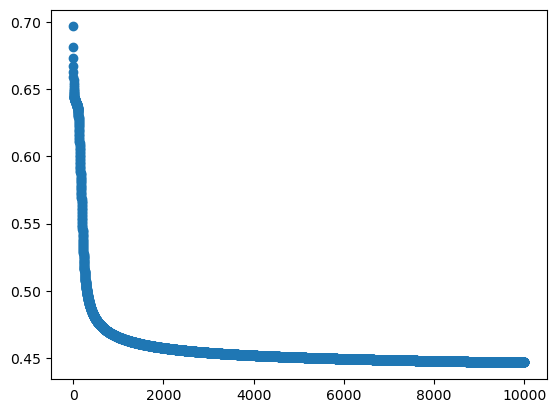

In [36]:
# Let's plot the cost as a function of number of iterations of the
# gradient descent algorithm.

plt.scatter(range(0, len(J_sequence)), J_sequence)
plt.show()

[[0.01343788 0.48524231]
 [1.4552981  0.61484328]] [[-2.33473076  1.89030378  2.13179279]]


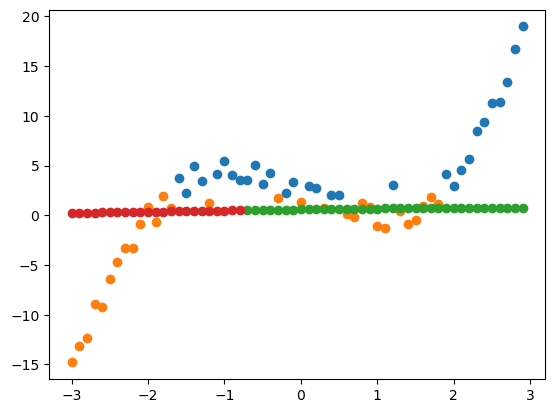

In [39]:
# Recreate original plot
print(W1, W2)

positives = np.array([(i, j) for i, j in zip(x_data, y_numeric_noisy) if j >= 2])
negatives = np.array([(i, j) for i, j in zip(x_data, y_numeric_noisy) if j < 2])
plt.scatter(positives[:,0], positives[:,1])
plt.scatter(negatives[:,0], negatives[:,1])

y_predicted = [make_prediction([1, x], W1, W2) for x in x_data]
positives = np.array([(i, j[0]) for i, j in zip(x_data, y_predicted) if j >= .5])
negatives = np.array([(i, j[0]) for i, j in zip(x_data, y_predicted) if j < .5])
plt.scatter(positives[:,0], positives[:,1])
plt.scatter(negatives[:,0], negatives[:,1])

# Neural Network 5, 2 hidden layers with 2 neurons each, regression



In [54]:
# Neural network 5, 2 hidden layers, regression

# Activation function is sigmoid for layer 1 and layer 2, but identity for layer 3
# Loss function is squared error

X_train = np.array(x_data).reshape((-1, 1))
X_train = np.hstack([ np.ones((len(x_data), 1)), X_train ])
y_train = y_numeric_noisy

W1 = np.array([[.1, .2], [.3, .4]])
W2 = np.array([[.5, .6, .7], [.7, .4, .2]])
W3 = np.array([[.1, .3, .5]])
            
def compute_z_vector(W, input_vector):
    return W @ input_vector

def compute_activation_vector(z_vector):
    return sigmoid(z_vector)

def compute_activation_vector_final(z_vector):
    return z_vector # identity function

def compute_loss(a, y):
    return .5 * (a - y) ** 2

def compute_cost(X_data, y_data, W1, W2, W3):
    m = X_data.shape[0] # number of data points
    cost = 0
    
    for i in range(m):
        y_hat = make_prediction(X_data[i], W1, W2, W3)
        y = y_data[i]
        cost += compute_loss(y_hat, y)
    total_cost = (1 / (2 * m)) * cost

    return total_cost

def augment_vector(v):
    return np.insert(v, 0, 1)

def forward_prop(W1, W2, W3, x, **kwargs):
    # process kwargs
    verbose = kwargs['verbose'] if 'verbose' in kwargs else False
    output_only = kwargs['output_only'] if 'output_only' in kwargs else False
    
    # we assume x has the 1 in front.
    
    # set input1
    in1 = x
    if verbose: print("Input to layer 1 is", in1)

    # get W1 matrix
    if verbose: print("Using W1 of shape", W1.shape, W1, in1)

    # compute z
    z1 = compute_z_vector(W1, in1)
    if verbose: print("z1 is", z1)

    # compute activation
    a1 = sigmoid(z1)
    if verbose: print("a1 is", a1)
    
    # set input2
    in2 = augment_vector(a1)
    if verbose: print("Input to layer 2 is", in2)

    # get W2 matrix
    if verbose: print("Using W2 of shape", W2.shape)

    # compute z
    z2 = compute_z_vector(W2, in2)
    if verbose: print("z2 is", z2)
    
    # compute activation
    a2 = sigmoid(z2)
    if verbose: print("a2 is", a2)
    
    # set input3
    in3 = augment_vector(a2)
    if verbose: print("Input to layer 3 is", in3)
    
    # get W3 matrix
    if verbose: print("Using W3 of shape", W3.shape)
    
    # compute z
    z3 = compute_z_vector(W3, in3)
    if verbose: print("z3 is", z3)

    # compute activation
    a3 = z3  # identity
    if verbose: print("a3 is", a3)
    
    if output_only:
        return a3
    else:
        return z1, a1, in2, z2, a2, in3, z3, a3
    
def make_prediction(x, W1, W2, W3):
    return forward_prop(W1, W2, W3, x, output_only=True)

def deriv_loss(a, y):
    return (a-y)

def deriv_sigmoid(z):
    return sigmoid(z) * (1-sigmoid(z))

def deriv_identity(z):
    return 1

def backward_prop(W1, W2, W3, x, y, z1, a1, in2, z2, a2, in3, z3, a3):
    # we assume x has the 1 in front.
    
    # Calculations for layer 3: (3 calculations)
    
    # compute dL/dw[3]00 
    dL_da_3_0 = deriv_loss(a3[0], y)
    da_3_0_dz_3_0 = deriv_identity(z3[0])
    dz_3_0_dw_3_00 = in3[0]
    # multiply
    dL_dw_3_00 = dL_da_3_0 * da_3_0_dz_3_0 * dz_3_0_dw_3_00
    
    # compute dL/dw[3]01  [first two terms are the same as above]
    dz_3_0_dw_3_01 = in3[1]
    # multiply
    dL_dw_3_01 = dL_da_3_0 * da_3_0_dz_3_0 * dz_3_0_dw_3_01
    
    # compute dL/dw[3]02  [first two terms are the same as above]
    dz_3_0_dw_3_02 = in3[2]
    # multiply
    dL_dw_3_02 = dL_da_3_0 * da_3_0_dz_3_0 * dz_3_0_dw_3_02
    
    ###########################
    ## Calcs for layer 2:  (6 calculations)
    
    # compute dL/dw[2]00  [first two terms are the same as in layer 3]
    dz_3_0_da_2_0 = W3[0][1]
    da_2_0_dz_2_0 = deriv_sigmoid(z2[0])
    dz_2_0_dw_2_00 = in2[0]
    # multiply
    dL_dw_2_00 = dL_da_3_0 * da_3_0_dz_3_0 * dz_3_0_da_2_0 * da_2_0_dz_2_0 * dz_2_0_dw_2_00
    
    # compute dL/dw[2]01  [first four terms are the same as above]
    dz_2_0_dw_2_01 = in2[1]
    # multiply
    dL_dw_2_01 = dL_da_3_0 * da_3_0_dz_3_0 * dz_3_0_da_2_0 * da_2_0_dz_2_0 * dz_2_0_dw_2_01
    
    # compute dL/dw[2]02  [first four terms are the same as above]
    dz_2_0_dw_2_02 = in2[2]
    # multiply
    dL_dw_2_02 = dL_da_3_0 * da_3_0_dz_3_0 * dz_3_0_da_2_0 * da_2_0_dz_2_0 * dz_2_0_dw_2_02
    
    # compute dL/dw[2]10  [first two terms are the same as in layer 3]
    dz_3_0_da_2_1 = W3[0][2]
    da_2_1_dz_2_1 = deriv_sigmoid(z2[1])
    dz_2_1_dw_2_10 = in2[0]
    # multiply
    dL_dw_2_10 = dL_da_3_0 * da_3_0_dz_3_0 * dz_3_0_da_2_1 * da_2_1_dz_2_1 * dz_2_1_dw_2_10
    
    # compute dL/dw[2]11  [first four terms are the same as above]
    dz_2_1_dw_2_11 = in2[1]
    # multiply
    dL_dw_2_11 = dL_da_3_0 * da_3_0_dz_3_0 * dz_3_0_da_2_1 * da_2_1_dz_2_1 * dz_2_1_dw_2_11
    
    # compute dL/dw[2]12  [first four terms are the same as above]
    dz_2_1_dw_2_12 = in2[1]
    # multiply
    dL_dw_2_12 = dL_da_3_0 * da_3_0_dz_3_0 * dz_3_0_da_2_1 * da_2_1_dz_2_1 * dz_2_1_dw_2_12
    
    ###########################
    ## Calcs for layer 1: (4 calculations)
    
    in1 = x
    
    # compute dL/dw[1]00  
    dz_2_0_da_1_0 = W2[0][1]
    da_1_0_dz_1_0 = deriv_sigmoid(z1[0])
    dz_1_0_dw_1_00 = in1[0]
    ######
    dz_2_1_da_1_0 = W2[1][1]
    # multiply & add
    dL_dw_1_00 = dL_da_3_0 * da_3_0_dz_3_0 * \
       (dz_3_0_da_2_0 * da_2_0_dz_2_0 * dz_2_0_da_1_0 * da_1_0_dz_1_0 * dz_1_0_dw_1_00 + \
        dz_3_0_da_2_1 * da_2_1_dz_2_1 * dz_2_1_da_1_0 * da_1_0_dz_1_0 * dz_1_0_dw_1_00)
    
    # compute dL/dw[1]01  
    dz_1_0_dw_1_01 = in1[1]
    # multiply & add
    dL_dw_1_01 = dL_da_3_0 * da_3_0_dz_3_0 * \
       (dz_3_0_da_2_0 * da_2_0_dz_2_0 * dz_2_0_da_1_0 * da_1_0_dz_1_0 * dz_1_0_dw_1_01 + \
        dz_3_0_da_2_1 * da_2_1_dz_2_1 * dz_2_1_da_1_0 * da_1_0_dz_1_0 * dz_1_0_dw_1_01)
    
    # compute dL/dw[1]10  
    dz_2_0_da_1_1 = W2[0][2]
    da_1_1_dz_1_1 = deriv_sigmoid(z1[1])
    dz_1_1_dw_1_10 = in1[0]
    ######
    dz_2_1_da_1_1 = W2[1][2]
    # multiply & add
    dL_dw_1_10 = dL_da_3_0 * da_3_0_dz_3_0 * \
       (dz_3_0_da_2_0 * da_2_0_dz_2_0 * dz_2_0_da_1_1 * da_1_1_dz_1_1 * dz_1_1_dw_1_10 + \
        dz_3_0_da_2_1 * da_2_1_dz_2_1 * dz_2_1_da_1_1 * da_1_1_dz_1_1 * dz_1_1_dw_1_10)
    
    # compute dL/dw[1]11  
    dz_1_1_dw_1_11 = in1[1]
    # multiply & add
    dL_dw_1_11 = dL_da_3_0 * da_3_0_dz_3_0 * \
       (dz_3_0_da_2_0 * da_2_0_dz_2_0 * dz_2_0_da_1_1 * da_1_1_dz_1_1 * dz_1_1_dw_1_11 + \
        dz_3_0_da_2_1 * da_2_1_dz_2_1 * dz_2_1_da_1_1 * da_1_1_dz_1_1 * dz_1_1_dw_1_11)
    
    # return updates to W1 and W2
    
    delta_W1 = np.array([[dL_dw_1_00, dL_dw_1_01], [dL_dw_1_10, dL_dw_1_11]])
    delta_W2 = np.array([[dL_dw_2_00, dL_dw_2_01, dL_dw_2_02], [dL_dw_2_10, dL_dw_2_11, dL_dw_2_12]])
    delta_W3 = np.array([[dL_dw_3_00, dL_dw_3_01, dL_dw_3_02]])
    return delta_W1, delta_W2, delta_W3
    

In [55]:
z1, a1, in2, z2, a2, in3, z3, a3 = forward_prop(W1, W2, W3, X_train[0], verbose=True)

Input to layer 1 is [ 1. -3.]
Using W1 of shape (2, 2) [[0.1 0.2]
 [0.3 0.4]] [ 1. -3.]
z1 is [-0.5 -0.9]
a1 is [0.37754067 0.2890505 ]
Input to layer 2 is [1.         0.37754067 0.2890505 ]
Using W2 of shape (2, 3)
z2 is [0.92885975 0.90882637]
a2 is [0.7168439  0.71275994]
Input to layer 3 is [1.         0.7168439  0.71275994]
Using W3 of shape (1, 3)
z3 is [0.67143314]
a3 is [0.67143314]


In [56]:
compute_cost(X_train, y_train, W1, W2, W3)

array([9.40236541])

In [57]:
backward_prop(W1, W2, W3, X_train[0], y_train[0], z1, a1, in2, z2, a2, in3, z3, a3)

(array([[ 0.28169541, -0.84508623],
        [ 0.20060124, -0.60180372]]),
 array([[0.94204457, 0.35566014, 0.27229845],
        [1.58364549, 0.59789058, 0.59789058]]),
 array([[15.47033346, 11.08981411, 11.02663397]]))

In [114]:
# stochastic gradient descent:

W1 = np.random.rand(2, 2) #np.array([[.1, .1], [.1, .1]])
W2 = np.random.rand(2, 3) #np.array([[.5, -.1, .1], [.1, .4, .2]])
W3 = np.random.rand(1, 3) #np.array([[.1, .1, -.1]])
ALPHA = .1

J_sequence = []

print("x train is", X_train)
print("y train is", y_train)

for ctr in range(0, 1000):
    #print("Iteration: ", ctr)
    #print("W =", W1, W2, W3)
    print("Cost is", compute_cost(X_train, y_train, W1, W2, W3))
    
    #for i in range(X_train.shape[0]):   # m
    #    z1, a1, in2, z2, a2, in3, z3, a3 = forward_prop(W1, W2, W3, X_train[i])
    #    delta_W1, delta_W2, delta_W3 = backward_prop(W1, W2, W3, X_train[i], y_train[i], z1, a1, in2, z2, a2, in3, z3, a3)
    #    #print("Gradients", delta_W1, delta_W2)
    #    W1 -= ALPHA * delta_W1
    #    W2 -= ALPHA * delta_W2
    #    W3 -= ALPHA * delta_W3
    #    #J_sequence.append(compute_cost(X_train, y_train, W1, W2))
        
    #"batch" gradient descent:
    D = [np.full_like(W1, 0), np.full_like(W2, 0), np.full_like(W3, 0)]
    for i in range(X_train.shape[0]):   # m
        z1, a1, in2, z2, a2, in3, z3, a3 = forward_prop(W1, W2, W3, X_train[i])
        delta_W1, delta_W2, delta_W3 = backward_prop(W1, W2, W3, X_train[i], y_train[i], z1, a1, in2, z2, a2, in3, z3, a3)
        #print("Gradients", delta_W1, delta_W2)
        #W[0][0] -= ALPHA * dL_dw0
        #W[0][1] -= ALPHA * dL_dw1
        D[0] += delta_W1
        D[1] += delta_W2 
        D[2] += delta_W3
    W1 -= ALPHA * D[0]/X_train.shape[0]
    W2 -= ALPHA * D[1]/X_train.shape[0]
    W3 -= ALPHA * D[2]/X_train.shape[0]
                              
    J_sequence.append(compute_cost(X_train, y_train, W1, W2, W3))
    
print("Final W1, W2, W3:", W1, W2, W3)

x train is [[ 1.00000000e+00 -3.00000000e+00]
 [ 1.00000000e+00 -2.90000000e+00]
 [ 1.00000000e+00 -2.80000000e+00]
 [ 1.00000000e+00 -2.70000000e+00]
 [ 1.00000000e+00 -2.60000000e+00]
 [ 1.00000000e+00 -2.50000000e+00]
 [ 1.00000000e+00 -2.40000000e+00]
 [ 1.00000000e+00 -2.30000000e+00]
 [ 1.00000000e+00 -2.20000000e+00]
 [ 1.00000000e+00 -2.10000000e+00]
 [ 1.00000000e+00 -2.00000000e+00]
 [ 1.00000000e+00 -1.90000000e+00]
 [ 1.00000000e+00 -1.80000000e+00]
 [ 1.00000000e+00 -1.70000000e+00]
 [ 1.00000000e+00 -1.60000000e+00]
 [ 1.00000000e+00 -1.50000000e+00]
 [ 1.00000000e+00 -1.40000000e+00]
 [ 1.00000000e+00 -1.30000000e+00]
 [ 1.00000000e+00 -1.20000000e+00]
 [ 1.00000000e+00 -1.10000000e+00]
 [ 1.00000000e+00 -1.00000000e+00]
 [ 1.00000000e+00 -9.00000000e-01]
 [ 1.00000000e+00 -8.00000000e-01]
 [ 1.00000000e+00 -7.00000000e-01]
 [ 1.00000000e+00 -6.00000000e-01]
 [ 1.00000000e+00 -5.00000000e-01]
 [ 1.00000000e+00 -4.00000000e-01]
 [ 1.00000000e+00 -3.00000000e-01]
 [ 1.0000

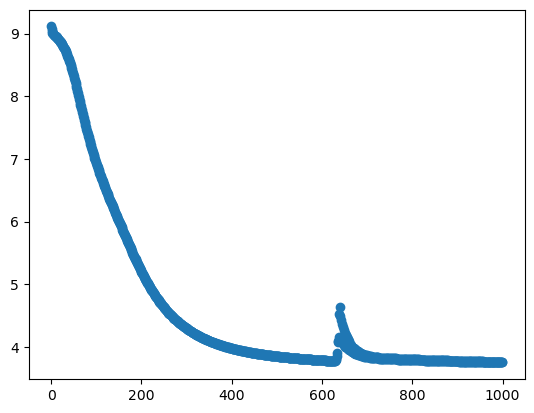

In [115]:
# Let's plot the cost as a function of number of iterations of the
# gradient descent algorithm.

plt.scatter(range(0, len(J_sequence)), J_sequence)
plt.show()

[[4.72754224 2.38202097]
 [5.93144475 2.54482094]] 
 [[-4.14090493  5.66382091  5.89137886]
 [-4.71854833  3.62620639  3.21884772]] 
 [[-13.12760634  10.73684658   7.13911648]]


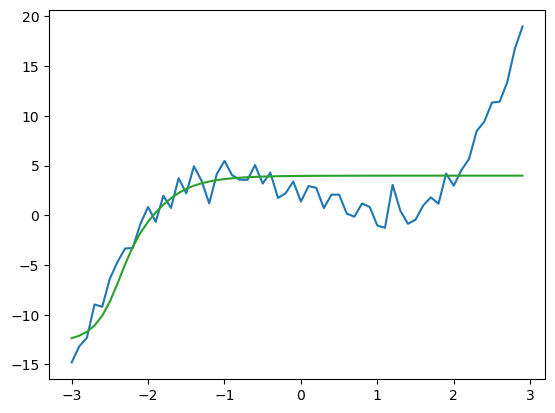

In [116]:
# Recreate original plot
print(W1, "\n", W2, "\n", W3)
y_predicted = [make_prediction([1, x], W1, W2, W3) for x in x_data]
plt.plot(x_data, y_numeric_noisy, -3, 3)
plt.plot(x_data, y_predicted)
plt.show()

<class 'numpy.ndarray'>
[-14.79890032 -13.1746032  -12.30246677  -8.96690563  -9.20164964
  -6.36778509  -4.69082367  -3.33921022  -3.30031036  -0.85594139
   0.83387709  -0.65645355   1.96027633   0.73684957   3.72400935
   2.20025546   4.92254345   3.47570199   1.19107419   4.15922616
   5.460804     4.02154745   3.56768137   3.55573462   5.04246302
   3.18531323   4.2850469    1.73763944   2.21266379   3.39094987
   1.37557372   2.93650369   2.75359668   0.72141576   2.06831376
   2.07255194   0.16790385  -0.14304721   1.18868887   0.83239283
  -1.03546213  -1.26154652   3.05551962   0.47139257  -0.85784363
  -0.44155769   0.97135303   1.79886977   1.15389267   4.18239441
   2.97477972   4.53488226   5.67070271   8.4666452    9.41566404
  11.33245722  11.40438548  13.38383222  16.76029573  18.97483724]
[array([[ 2.00425664,  2.21155782, -1.71041002, -1.19137127,  0.31224537,
        -1.45538397, -2.51394197, -3.25616434, -0.15247793,  0.05733363]]), array([[ 3.52636089],
       [ 4.

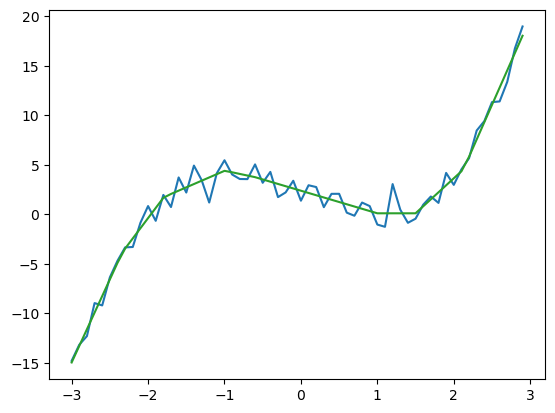

[-14.96587848 -13.28852041 -11.61116235  -9.93380428  -8.25644622
  -6.57908816  -4.90173009  -3.45642315  -2.43179329  -1.40716344
  -0.38253358   0.64209628   1.66672613   2.05756067   2.39105691
   2.72455315   3.05804939   3.39154563   3.72504187   4.05853811
   4.39203435   4.24486813   4.08135429   3.91784045   3.75362764
   3.52546349   3.29729934   3.06913518   2.84097103   2.61280688
   2.38464272   2.15647857   1.92831442   1.70015026   1.47198611
   1.24382196   1.0156578    0.78749365   0.5593295    0.33116534
   0.10349281   0.10349281   0.10349281   0.10349281   0.10349281
   0.10349281   0.81026603   1.51703926   2.22381248   2.93058571
   3.63735893   4.34413216   5.81650144   7.56258987   9.30867831
  11.05476674  12.80085518  14.54694361  16.29303205  18.03912048]


In [151]:
from sklearn.neural_network import MLPRegressor
X = x_data.reshape(-1, 1)
print(type(X))
y = y_numeric_noisy
print(y)
clf = MLPRegressor(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(10), random_state=1)

clf.fit(X, y)
print(clf.coefs_)
print(clf.intercepts_)

# Recreate original plot
print(W1, "\n", W2, "\n", W3)
y_predicted = clf.predict(x_data.reshape(-1, 1))
plt.plot(x_data, y_numeric_noisy, -3, 3)
plt.plot(x_data, y_predicted)
plt.show()
print(y_predicted)